# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

In [3]:
url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
responses = []

# Get weather data
print("Beginning Data Retrieval")
print("---------------------------------")

city_counter = 1
set_counter = 1

for i, city in enumerate(cities):
    if (i%50 == 0 and i>= 50):
        set_counter += 1
        city_counter = 0
        
    city_url = url + "&q=" + city    
    print("Processing Record %s of Set %s | %s" % (city_counter, set_counter, city)) 
    city_counter += 1
       
    try:
        response = requests.get(city_url).json()
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        dates = response["dt"]
        country = response["sys"]["country"]
        
        responses.append({"City": city, "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Humidity":humidity,
                          "Cloudiness":cloudiness, "Wind Speed":wind_speed, "Date":dates, "Country":country})
               
        
    except:
        print(f"City not found. Skipping...")
        pass
    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    


Beginning Data Retrieval
---------------------------------
Processing Record 1 of Set 1 | nosy varika
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | sakaiminato
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | superior
Processing Record 9 of Set 1 | bolobo
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | ahipara
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | numan
Processing Record 19 of Set 1 | berlevag
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | nanortalik
Processing Record 23 of Set 1 

Processing Record 35 of Set 4 | roma
Processing Record 36 of Set 4 | kalabo
Processing Record 37 of Set 4 | chuy
Processing Record 38 of Set 4 | turayf
Processing Record 39 of Set 4 | luderitz
Processing Record 40 of Set 4 | colares
Processing Record 41 of Set 4 | kieta
Processing Record 42 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 43 of Set 4 | magnitka
Processing Record 44 of Set 4 | nguiu
City not found. Skipping...
Processing Record 45 of Set 4 | tiksi
Processing Record 46 of Set 4 | labrea
Processing Record 47 of Set 4 | jumla
Processing Record 48 of Set 4 | pemba
Processing Record 49 of Set 4 | kahului
Processing Record 0 of Set 5 | sao joao da barra
Processing Record 1 of Set 5 | bengkulu
Processing Record 2 of Set 5 | sosnovo-ozerskoye
Processing Record 3 of Set 5 | mezen
Processing Record 4 of Set 5 | yar-sale
Processing Record 5 of Set 5 | ellsworth
Processing Record 6 of Set 5 | khani
Processing Record 7 of Set 5 | fairbanks
Processing Record 8 of

Processing Record 24 of Set 8 | tongchuan
Processing Record 25 of Set 8 | areia branca
Processing Record 26 of Set 8 | mackenzie
Processing Record 27 of Set 8 | nuuk
Processing Record 28 of Set 8 | paracatu
Processing Record 29 of Set 8 | dannenberg
Processing Record 30 of Set 8 | sebinkarahisar
Processing Record 31 of Set 8 | agadir
Processing Record 32 of Set 8 | kalamare
Processing Record 33 of Set 8 | lurgan
Processing Record 34 of Set 8 | chagda
City not found. Skipping...
Processing Record 35 of Set 8 | kavieng
Processing Record 36 of Set 8 | pachino
Processing Record 37 of Set 8 | tulun
Processing Record 38 of Set 8 | portland
Processing Record 39 of Set 8 | morondava
Processing Record 40 of Set 8 | belaya gora
Processing Record 41 of Set 8 | novo aripuana
Processing Record 42 of Set 8 | benjamin constant
Processing Record 43 of Set 8 | la peca
Processing Record 44 of Set 8 | mount pleasant
Processing Record 45 of Set 8 | sumbe
Processing Record 46 of Set 8 | san jeronimito
Proc

City not found. Skipping...
Processing Record 12 of Set 12 | merritt island
Processing Record 13 of Set 12 | berbera
Processing Record 14 of Set 12 | rocha
Processing Record 15 of Set 12 | olinda
Processing Record 16 of Set 12 | esmeraldas
Processing Record 17 of Set 12 | beringovskiy
Processing Record 18 of Set 12 | umm kaddadah
Processing Record 19 of Set 12 | ostrovnoy
Processing Record 20 of Set 12 | laguna
Processing Record 21 of Set 12 | bireun
Processing Record 22 of Set 12 | bayir
Processing Record 23 of Set 12 | avera
Processing Record 24 of Set 12 | mazara del vallo
Processing Record 25 of Set 12 | salem
Processing Record 26 of Set 12 | aranos
Processing Record 27 of Set 12 | lodja
Processing Record 28 of Set 12 | harboore
Processing Record 29 of Set 12 | nemours
Processing Record 30 of Set 12 | kupino
Processing Record 31 of Set 12 | valparaiso
Processing Record 32 of Set 12 | kindu
Processing Record 33 of Set 12 | tezu
Processing Record 34 of Set 12 | port lincoln
Processin

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_df = pd.DataFrame(responses, columns=["City","Lat","Lng","Max Temp","Humidity",
                                             "Cloudiness","Wind Speed","Date","Country"])
#convert date from int64 to datetime format
cities_df['Date'] = pd.to_datetime(cities_df['Date'])
#remove unnecessary sec, min, hours
cities_df = cities_df.assign(Date = lambda x: pd.to_datetime(x['Date'].dt.strftime('%Y-%m-%d')))
cities_df.to_csv('output.csv', index=True)


In [5]:
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
0,nosy varika,-20.5833,48.5333,66.16,85,5,3.33,1970-01-01,MG
1,bredasdorp,-34.5322,20.0403,58.32,67,66,14.97,1970-01-01,ZA
2,busselton,-33.6500,115.3333,53.20,75,77,7.99,1970-01-01,AU
3,sakaiminato,35.5500,133.2333,80.58,78,75,6.91,1970-01-01,JP
4,punta arenas,-53.1500,-70.9167,44.71,76,75,17.27,1970-01-01,CL


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
cities_df['Humidity'].describe()

count    542.000000
mean      67.195572
std       22.202366
min        8.000000
25%       54.000000
50%       72.000000
75%       85.000000
max      100.000000
Name: Humidity, dtype: float64

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

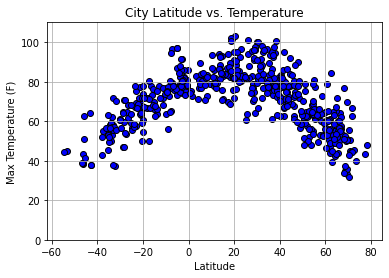

In [7]:
"""This plot looks at the relationship between temperature and latitude. It appears that the latitude range from 0 to 40 has
the highest temperature"""

x_axis = cities_df['Lat']
y_axis = cities_df['Max Temp']

#make a scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
# Set the upper and lower limits of our y axis
plt.ylim(0,110)

# Set the upper and lower limits of our x axis
plt.xlim(-62,85)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("lat_temp_plot.png")



## Latitude vs. Humidity Plot

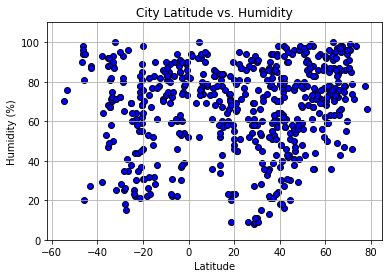

In [8]:
"""This plot shows the relationship between humidity and latitude. The humidity range fluctuates greatly across all latitudes"""

x_axis = cities_df['Lat']
y_axis = cities_df['Humidity']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
# Set the upper and lower limits of our y axis
plt.ylim(0,110)

# Set the upper and lower limits of our x axis
plt.xlim(-62,85)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("lat_humidity.png")

## Latitude vs. Cloudiness Plot

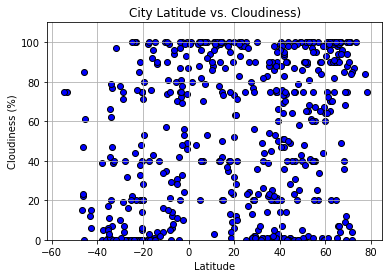

In [10]:
"""The humidity rate is very scattered across all latitude and it seems there is no significant difference with latitude"""

x_axis = cities_df['Lat']
y_axis = cities_df['Cloudiness']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
# Set the upper and lower limits of our y axis
plt.ylim(0,110)

# Set the upper and lower limits of our x axis
plt.xlim(-62,85)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Cloudiness)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("lat_cloudiness.png")

## Latitude vs. Wind Speed Plot

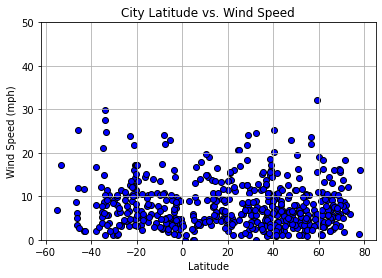

In [11]:
"""Wind speed seems rather stable through entire latitude, however it might be that wind speed is often lower at latitudes
above 20 since the points are denser in that region"""

x_axis = cities_df['Lat']
y_axis = cities_df['Wind Speed']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
# Set the upper and lower limits of our y axis
plt.ylim(0,50)

# Set the upper and lower limits of our x axis
plt.xlim(-62,85)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("lat_windspeed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:0.5335784273298525


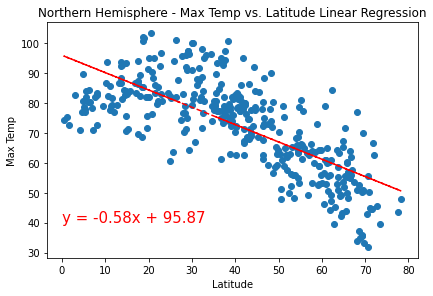

In [12]:
"""The following linear regression trend for northern hemisphere clearly shows the downward trend of temperature with latitude.
This makes sense as low latitude northern countries are cold countries in north pole such as Norway, Finland, Northwest territories 
of Canada, Russia etc"""

# define northern and southern hemispheres to use for regression analysis
northern_hem_df = cities_df[cities_df['Lat'] >= 0]
southern_hem_df = cities_df[cities_df['Lat'] < 0]

x_axis = northern_hem_df['Lat']
y_axis = northern_hem_df['Max Temp']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is:{rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,40),fontsize=15,color="red")

plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6220303791491909


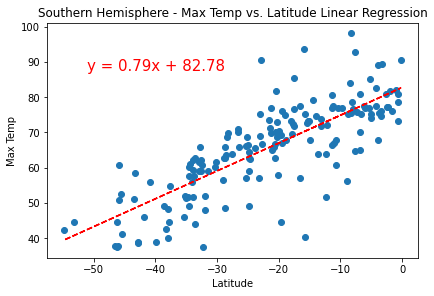

In [73]:
"""In southern hemisphere we observe that temperature increases as latitude increase from negative towards zero.
This makes sense because temperature is much lower in south pole"""

x_axis = southern_hem_df['Lat']
y_axis = southern_hem_df['Max Temp']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.2, .8), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.00041356078713175614


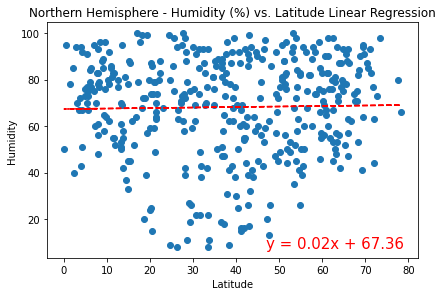

In [74]:
"""There is a very minor correlation in humidity versus latitude as data are very scattered. However, the trendline suggests
 very small decline in humidity as latitude increases"""

x_axis = northern_hem_df['Lat']
y_axis = northern_hem_df['Humidity']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.6, .2), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.01031687932306832


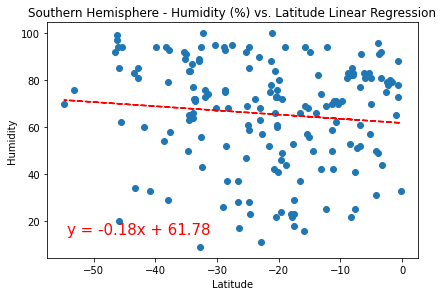

In [76]:
"""Compared to northern hemisphere, in southern hemisphere there is a better correlation of humidity decrease with increase of 
latitude. The data is still widely scattered"""

x_axis = southern_hem_df['Lat']
y_axis = southern_hem_df['Humidity']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.15, .25), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.003651643461907175


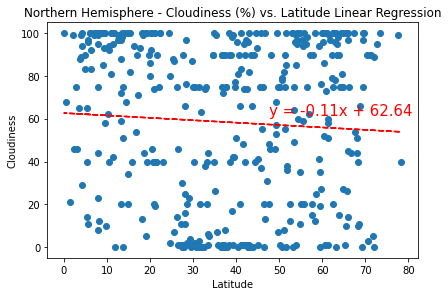

In [78]:
"""There is no clear difference in cloudiness with change of latitude in norhtern hemisphere"""

x_axis = northern_hem_df['Lat']
y_axis = northern_hem_df['Cloudiness']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.6, .65), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11783216146650885


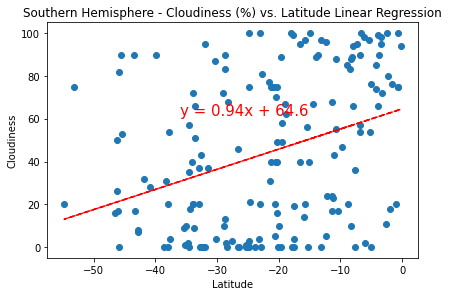

In [79]:
"""In southern hemisphere there is a clear evidence that cloudiness increased with higher latitude, with denser scatter points
at higher latitudes"""

x_axis = southern_hem_df['Lat']
y_axis = southern_hem_df['Cloudiness']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.4, .65), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.015294514324820542


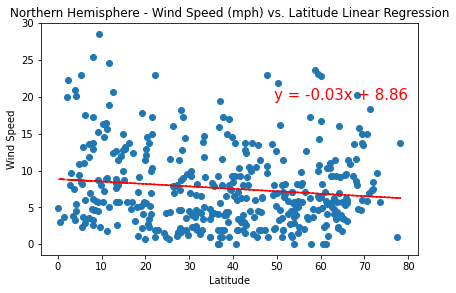

In [80]:
"""The wind speed shows very minor reduction with increase of latitude in northern hemisphere"""

x_axis = northern_hem_df['Lat']
y_axis = northern_hem_df['Wind Speed']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.6, .7), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0016173973420526978


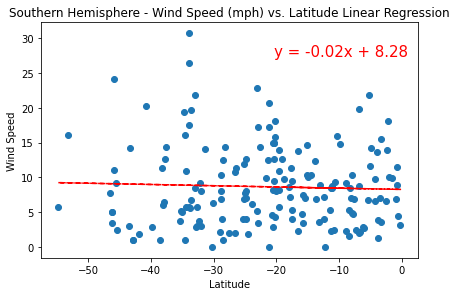

In [81]:
"""There is no clear indications of wind speed change with increase of latitude in southern hemisphere"""

x_axis = southern_hem_df['Lat']
y_axis = southern_hem_df['Wind Speed']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.6, .85), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

plt.show()